In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
Recent_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Recent_Date

('2017-08-23',)

2016-08-23
            Date  Precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23           0.02
4     2016-08-23           1.79
...          ...            ...
2016  2017-08-22           0.50
2017  2017-08-23           0.00
2018  2017-08-23           0.00
2019  2017-08-23           0.08
2020  2017-08-23           0.45

[2021 rows x 2 columns]


Text(0, 0.5, 'Inches')

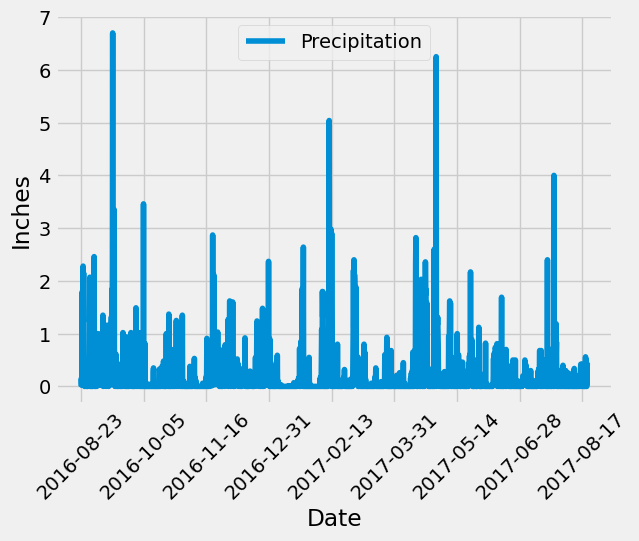

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
Previous_Year = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(Previous_Year)

# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= Previous_Year, Measurement.prcp != None).\
    order_by(Measurement.date).all()
year_prcp

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
df.head()

# Sort the dataframe by date
df.sort_values(by='Date')
print(df)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x= "Date", y= "Precipitation")
plt.xticks(rotation= 45)
plt.ylabel("Inches")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
               order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_for__active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                      filter(Measurement.station == 'USC00519281' ).all()
temperature_for__active_station


[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

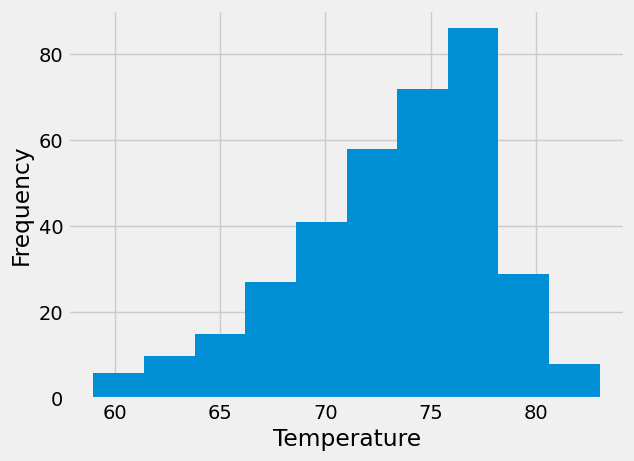

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
      filter(Measurement.date >= Previous_Year, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()
year_temp
df1 = pd.DataFrame(year_temp, columns=['Tobs'])
df1
plt.hist(df1)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
#plt.title("Tobs")

# Close Session

In [16]:
# Close Session
session.close()